### <font size=5>**Multiple Linear Regression - BoomBikes Bike Sharing Prediction**</font>
***

#### <font color='#000080' size=5>***Problem Statement:***</font>

</br>
<font size=3 font-family:"Calibri">
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
</font>
</br>
</br>
<font size=3 font-family:"Calibri">
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
</font>

#### <font color='#000080' size=5>***Business Goal:***</font>

</br>
<font size=3 font-family:"Calibri">
Need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 
</font>

#### <font color='#000080' size=5>***Objective:***</font>
</br>
<font size=3> 1. Identify variables that are significant in predicting the demand for shared bikes.</font>
</br>
<font size=3> 2. How well these variables describe the bike demands</font>

#### <font color='#000080' size=5>***1. Exploratory Data Analysis:***</font>

#### <font color='black' size=3.2>1.1 Data Sourcing</font>

In [253]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [254]:
#First parameter for read_csv in the below command specifies the path of day.csv file that serves as source of data
bike_df = pd.read_csv("C:\Rajani\EPGP-ML_AI\Assignments\LinearRegression\day.csv")
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [255]:
#Understanding the DataSet

In [256]:
bike_df.shape

(730, 16)

In [257]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> - Dataset has 730 rows and 16 columns </font>
> </br> 
> <font size=3.5> - No NULL values found </font>
> </br> 
> <font size=3.5> - Certain categorical variables are defined in numeric terms - holiday, yr, mnth, weekday, weathersit </font>
> </br> 

#### <font color='black' size=3.2>1.2 Data Cleaning</font>

In [258]:
#Check for Duplicate rows

In [259]:
bike_df.shape

(730, 16)

In [260]:
duplicate_check_df = bike_df.copy()
duplicate_check_df.drop_duplicates(inplace=True)
duplicate_check_df.shape

(730, 16)

In [261]:
#For Better analysis, replace the numeric encoding with categorical values for categorical variables.

In [262]:
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [263]:
#Replace the values of 'season' column with proper names rather than the encoded form 

In [264]:
bike_df[['season']]=bike_df[['season']].apply(lambda x: x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [265]:
#Replace the values of 'weathersit' column with proper names rather than the encoded form 

In [266]:
bike_df[['weathersit']]=bike_df[['weathersit']].apply(lambda x: x.map({1:"Clear",2:"Mist",3:"Light Snow",4:"Heavy Rain"}))
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [267]:
# Change the weekday column encoding to meaningful categories. 
bike_df[['weekday']]=bike_df[['weekday']].apply(lambda x: x.map({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",
                                                                4:"Friday",5:"Saturday",6:"Sunday"}))
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [268]:
# Change the month encoding mnth meaningful categories
bike_df[['mnth']]=bike_df[['mnth']].apply(lambda x: x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",
                                                                5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",
                                                                10:"Oct",11:"Nov",12:"Dec"}))
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [269]:
#Convert the datatype of the categorical variables

In [270]:
bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')

In [271]:
#Split columns for better analysis

In [272]:
#Extract Date from dteday field and remove dteday field

In [273]:
bike_df['dteday'] =  pd.to_datetime(bike_df['dteday'],format = '%d-%m-%Y')
bike_df['day'] = bike_df['dteday'].dt.day
bike_df.drop('dteday',axis=1,inplace=True)
bike_df.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,spring,0,Jan,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,spring,0,Jan,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [274]:
#Remove unnecessary columns
bike_df.drop(['instant'],axis=1,inplace=True)

In [275]:
#Check for outliers in continuous variables

In [276]:
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,15.720548
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,8.802278
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,8.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,16.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,23.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,31.000000


> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> - No Duplicate records found </font>
> </br> 
> <font size=3.5> - Replaced numeric encoding of categorical variables with categorical values - season, weathersit, weekday, mnth </font>
> </br> 
> <font size=3.5> - Split columns for better analysis- Extract Day from dteday field  </font>
> </br> 
> <font size=3.5> - Remove unnecessary columns - instant, dteday  </font>
> </br> 
> <font size=3.5> - No outliers found in numeric variables  </font>
> </br> 

#### <font color='black' size=3.2>1.3 Univariate Analysis</font>

In [277]:
#Set the Styling parameter for the graphs
sns.set(style="whitegrid", color_codes=True)

In [278]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,spring,0,Jan,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,spring,0,Jan,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [279]:
#----------- Analysis on Categorical variables

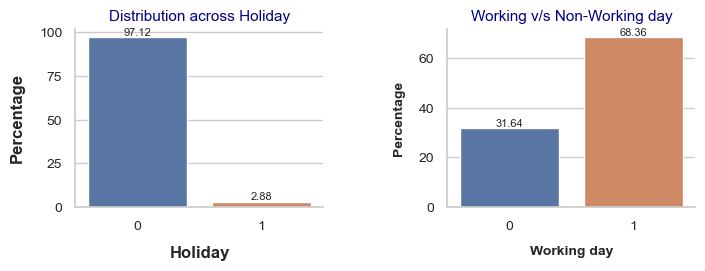

In [280]:
#---------------------------- Analyze Bike Rentals on Working days and Holidays --------------------------
plt.figure(figsize=(8,2))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.8, wspace=0.5)

ax = plt.subplot(1,2,1)

#Better to display values as percentages instead of count, so that we get clear indication of distribution
holidaydf = bike_df["holiday"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=holidaydf, x="holiday", y="proportion")
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Holiday",fontweight='bold')
plt.ylabel('Percentage',fontweight='bold')
plt.title('Distribution across Holiday',fontdict={"fontsize":11, "color":"#000080"})
plt.rc('axes', titlesize=12,labelpad=10)   
plt.rc('axes', labelsize=10,labelpad=10)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

ax = plt.subplot(1,2,2)
workingdaydf = bike_df["workingday"].value_counts(normalize=True).mul(100).round(2).reset_index()
barplotresult = sns.barplot(data=workingdaydf, x="workingday", y="proportion")
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Working day",fontweight='bold')
plt.ylabel('Percentage',fontweight='bold')
plt.title('Working v/s Non-Working day',fontdict={"fontsize":11,"color":"#000080"})
plt.rc('axes', titlesize=12,labelpad=10)   
plt.rc('axes', labelsize=10,labelpad=10)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

In [281]:
#Inference: 
#This shows Bike rentals are maximum during the non-holidays and on working days

In [282]:
#-------------------------------- Check the distribution of continuous variables

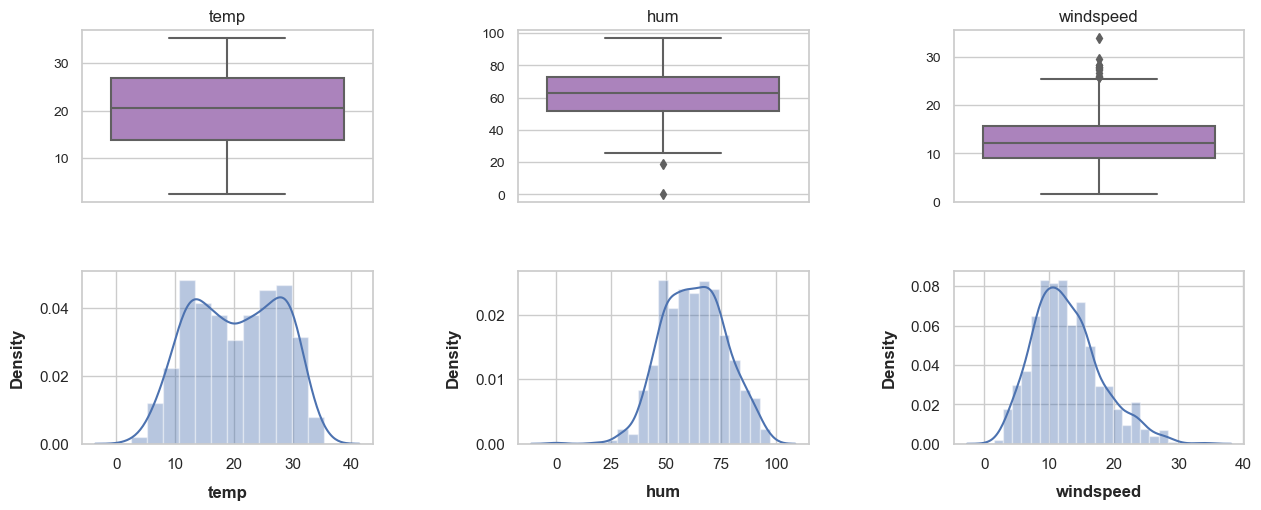

In [283]:
import itertools
outlier_col_names_to_check = ['temp','hum','windspeed']

plt.figure(figsize=[15,6])
plt.subplots_adjust(top = 0.70, bottom=0.01, hspace=0.4, wspace=0.5)

for i,j in itertools.zip_longest(outlier_col_names_to_check, range(len(outlier_col_names_to_check))):
    plt.subplot(2,3,j+1)
    g=sns.boxplot(y = bike_df[i], orient = "h", color = "#AF7AC5")
    plt.xlabel("")
    plt.ylabel("")
    g.tick_params(labelsize=10)
    plt.title(i, fontsize=12)
    

plt.subplot(2,3,4)
sns.distplot(bike_df['temp'])
plt.xlabel("temp",fontweight='bold',fontsize=12)
plt.ylabel('Density',fontweight='bold',fontsize=12)

plt.subplot(2,3,5)
sns.distplot(bike_df['hum'])
plt.xlabel("hum",fontweight='bold',fontsize=12)
plt.ylabel('Density',fontweight='bold',fontsize=12)

plt.subplot(2,3,6)
sns.distplot(bike_df['windspeed'])
plt.xlabel("windspeed",fontweight='bold',fontsize=12)
plt.ylabel("Density",fontweight='bold',fontsize=12)

plt.show()

In [284]:
#Inference: 
#Bikes were rented at an average temperature (temp) of 20°C.
#Humidity (hum) averaged around 62 during bike rentals.
#The average windspeed (windspeed) during bike rentals is approximately 12.

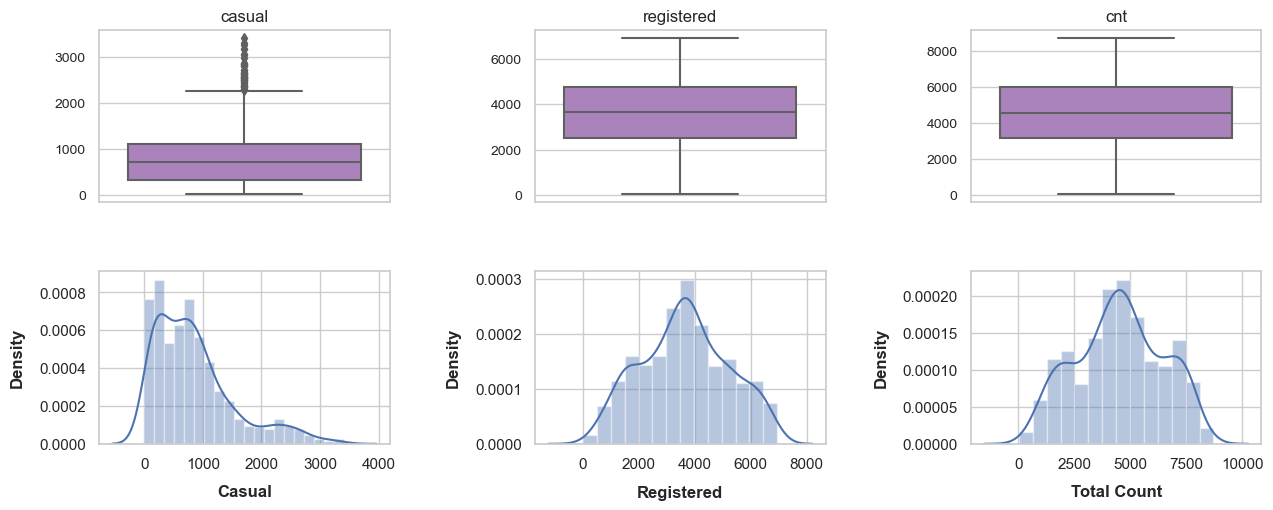

In [285]:
import itertools
outlier_col_names_to_check = ['casual','registered','cnt']

plt.figure(figsize=[15,6])
plt.subplots_adjust(top = 0.70, bottom=0.01, hspace=0.4, wspace=0.5)
for i,j in itertools.zip_longest(outlier_col_names_to_check, range(len(outlier_col_names_to_check))):
    plt.subplot(2,3,j+1)
    g=sns.boxplot(y = bike_df[i], orient = "h", color = "#AF7AC5")
    plt.xlabel("")
    plt.ylabel("")
    g.tick_params(labelsize=10)
    plt.title(i, fontsize=12)
    
plt.subplot(2,3,4)
sns.distplot(bike_df['casual'])
plt.xlabel("Casual",fontweight='bold',fontsize=12)
plt.ylabel('Density',fontweight='bold',fontsize=12)

plt.subplot(2,3,5)
sns.distplot(bike_df['registered'])
plt.xlabel("Registered",fontweight='bold',fontsize=12)
plt.ylabel('Density',fontweight='bold',fontsize=12)

plt.subplot(2,3,6)
sns.distplot(bike_df['cnt'])
plt.xlabel("Total Count",fontweight='bold',fontsize=12)
plt.ylabel("Density",fontweight='bold',fontsize=12)

plt.show()

In [286]:
#Inference: 
#Uniform distribution is found on the Total Bike rental count with an average count of 5000

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> - Bike rentals are maximum during the non-holidays and on working days </font>
> </br> 
> <font size=3.5> - Bikes were rented at an average temperature (temp) of 20°C. </font>
> </br> 
> <font size=3.5> - Humidity (hum) averaged around 62 during bike rentals.  </font>
> </br> 
> <font size=3.5> - The average windspeed (windspeed) during bike rentals is approximately 12.  </font>
> </br> 
> <font size=3.5> - Uniform distribution is found on the Total Bike rental count with an average count of 5000  </font>
> </br> 

#### <font color='black' size=3.2>1.5 Bivariate Analysis</font>

In [287]:
#--------------- Analyze various categorical and Numerical variables against the target variable 'cnt'

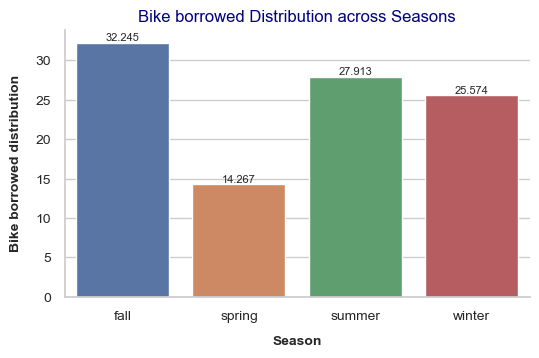

In [288]:
#Analyze number of bikes borrowed across various season
plt.figure(figsize=(6,3))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.8, wspace=0.5)

ax = plt.subplot(1,1,1)

#Better to display values as percentages instead of count, so that we get clear indication of distribution
seasonsdf = pd.pivot_table(data=bike_df,index='season', values='cnt', aggfunc='sum')
total = seasonsdf.sum()
seasonsdf = round( ((seasonsdf / total) * 100),3)
barplotresult = sns.barplot(data=seasonsdf, x=seasonsdf.index, y="cnt")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Season",fontweight='bold')
plt.ylabel('Bike borrowed distribution',fontweight='bold')
plt.title('Bike borrowed Distribution across Seasons',fontdict={"fontsize":12, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=12,labelpad=10)   
plt.rc('axes', labelsize=10,labelpad=10)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

In [289]:
#Inference: 
#Bike rentals are more frequent in fall followed by summer and winter

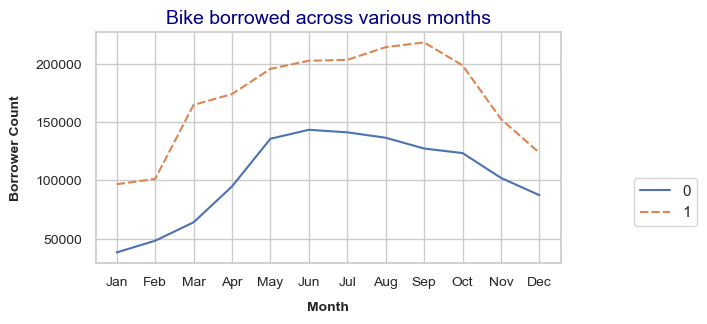

In [290]:
#-------------------------- Analyze Bikes borrowed in various months and years ------------------------
plt.figure(figsize=(6,3))
ordered_list=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
monthYear_df = pd.pivot_table(data=bike_df,index='mnth', columns=['yr'], values='cnt', aggfunc='sum')
monthYear_df = monthYear_df.reindex(ordered_list)
ax = sns.lineplot(data=monthYear_df, sort= True)

legend = plt.legend(bbox_to_anchor=(1.31,0.4)) 

ax.set(xticks=monthYear_df.index)
plt.xlabel("Month",fontweight='bold')
plt.ylabel('Borrower Count',fontweight='bold')
plt.title('Bike borrowed across various months', fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=14,labelpad=12)   
plt.rc('axes', labelsize=12,labelpad=12)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [291]:
#Inference: 
#Bikes borrowed is very less in first quarter of the year, gradually rises in second and third quarter and again descends during the last quarter. Also, we could see increase in the number of borrowers from 2008 to 2009 indicateating growth in the market. The company can capitalize on this trend by maintaining a competitive edge in the industry.

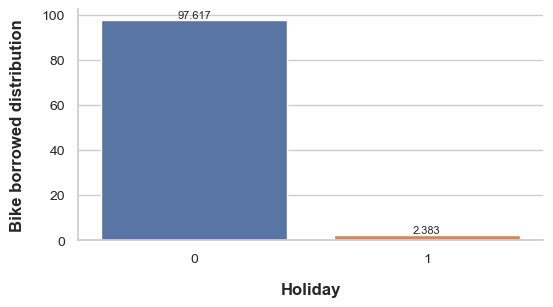

In [292]:
#Analyze the effect of hoildays on Bike borrowing
plt.figure(figsize=(6,3))

#Better to display values as percentages instead of count, so that we get clear indication of distribution
holidaydf = pd.pivot_table(data=bike_df,index='holiday', values='cnt', aggfunc='sum')
total = holidaydf.sum()
holidaydf = round( ((holidaydf / total) * 100),3)
barplotresult = sns.barplot(data=holidaydf, x=holidaydf.index, y="cnt")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Holiday",fontweight='bold')
plt.ylabel('Bike borrowed distribution',fontweight='bold')
#plt.title('Bike borrowed Distribution',fontdict={"fontsize":12, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=12,labelpad=10)   
plt.rc('axes', labelsize=10,labelpad=10)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

In [293]:
#Inference: 
#97% of bike bookings occurred when it was not a holiday, indicating a significant bias in the data

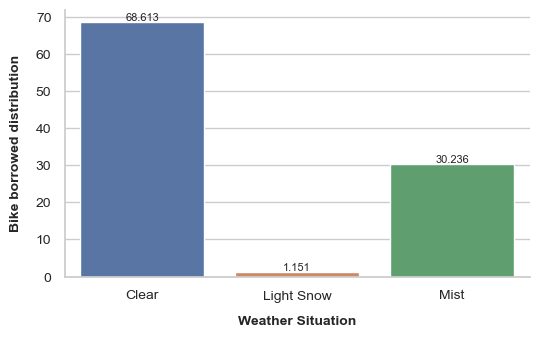

In [294]:
#Analyze does weather situation has any impact
plt.figure(figsize=(6,3))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.8, wspace=0.5)

ax = plt.subplot(1,1,1)

#Better to display values as percentages instead of count, so that we get clear indication of distribution
weathersitdf = pd.pivot_table(data=bike_df,index='weathersit', values='cnt', aggfunc='sum')
total = weathersitdf.sum()
weathersitdf = round( ((weathersitdf / total) * 100),3)
barplotresult = sns.barplot(data=weathersitdf, x=weathersitdf.index, y="cnt")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Weather Situation",fontweight='bold')
plt.ylabel('Bike borrowed distribution',fontweight='bold')
#plt.title('Bike borrowed Distribution across Seasons',fontdict={"fontsize":12, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=12,labelpad=10)   
plt.rc('axes', labelsize=10,labelpad=10)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

In [295]:
#Inference: 
#No. of bikes borrowed is maximum when the weather is clear which reduces to almost half when weather is mist. When there is light snowfall, bikes borrowed is very less accounting only to 1% of total distribution

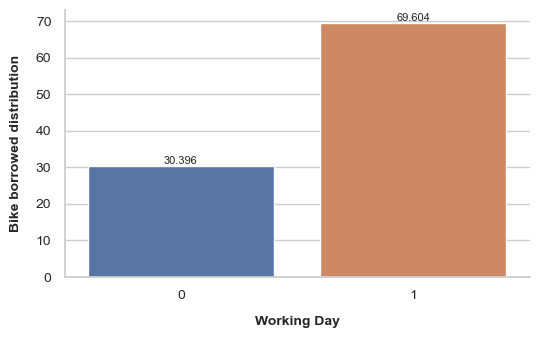

In [296]:
#Analyze working Day v/s Non - working day
plt.figure(figsize=(6,3))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.8, wspace=0.5)

ax = plt.subplot(1,1,1)

#Better to display values as percentages instead of count, so that we get clear indication of distribution
workingdaydf = pd.pivot_table(data=bike_df,index='workingday', values='cnt', aggfunc='sum')
total = workingdaydf.sum()
workingdaydf = round( ((workingdaydf / total) * 100),3)
barplotresult = sns.barplot(data=workingdaydf, x=workingdaydf.index, y="cnt")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Working Day",fontweight='bold')
plt.ylabel('Bike borrowed distribution',fontweight='bold')
#plt.title('Bike borrowed Distribution across Seasons',fontdict={"fontsize":12, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=12,labelpad=10)   
plt.rc('axes', labelsize=10,labelpad=10)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

In [297]:
#Inference: 
#Distribution across working and non-working days is found to be 70-30. This clearly states that fair amount of population use rented bikes not only for work, but in general as a communication mode

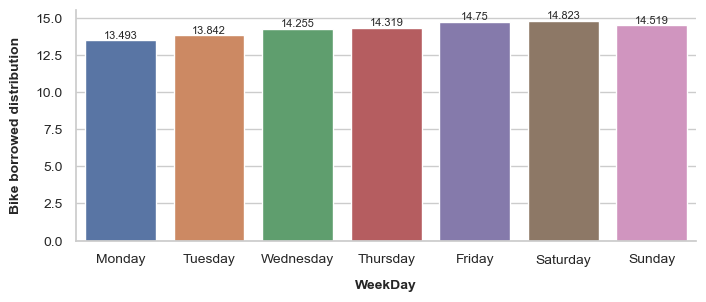

In [298]:
#Analyze which day of the week, people would go more for shared bikes
plt.figure(figsize=(8,3))

#Better to display values as percentages instead of count, so that we get clear indication of distribution
weekdaydf = pd.pivot_table(data=bike_df,index='weekday', values='cnt', aggfunc='sum')
total = weekdaydf.sum()
weekdaydf = round( ((weekdaydf / total) * 100),3)
order_list=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
barplotresult = sns.barplot(data=weekdaydf, x=weekdaydf.index, y="cnt", order=order_list)
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("WeekDay",fontweight='bold')
plt.ylabel('Bike borrowed distribution',fontweight='bold')
#plt.title('Bike borrowed Distribution across Seasons',fontdict={"fontsize":12, "fontweight":5,"color":"#000080"})
plt.rc('axes', titlesize=12,labelpad=10)   
plt.rc('axes', labelsize=10,labelpad=10)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

In [299]:
#Inference: 
#No significant Difference found

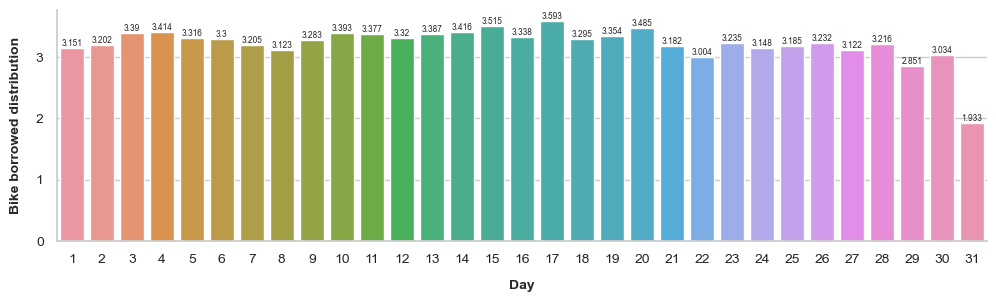

In [300]:
#Analyze bike rentals w.r.t Date
plt.figure(figsize=(12,3))

#Better to display values as percentages instead of count, so that we get clear indication of distribution
daydf = pd.pivot_table(data=bike_df,index='day', values='cnt', aggfunc='sum')
total = daydf.sum()
daydf = round( ((daydf / total) * 100),3)
barplotresult = sns.barplot(data=daydf, x=daydf.index, y="cnt")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=6)
plt.xlabel("Day",fontweight='bold')
plt.ylabel('Bike borrowed distribution',fontweight='bold')
plt.rc('axes', titlesize=12,labelpad=10)   
plt.rc('axes', labelsize=10,labelpad=10)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

In [301]:
#Inference: 
#No significant Difference found

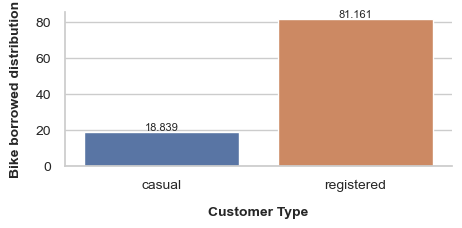

In [302]:
#Distribution across Casual v/s registered customers
plt.figure(figsize=(5,2))
CustType_df = bike_df[['casual','registered']]
totalCount = bike_df['cnt'].sum()
CustType_Perct = round( ((CustType_df.sum() / totalCount) * 100),3)
CustType_newdf = pd.DataFrame(CustType_Perct, columns=['Percentage'])
barplotresult = sns.barplot(data=CustType_newdf, x=CustType_newdf.index, y="Percentage")
#Add labels to Bar
for i in barplotresult.containers:
    barplotresult.bar_label(i,fontsize=8)
plt.xlabel("Customer Type",fontweight='bold')
plt.ylabel('Bike borrowed distribution',fontweight='bold')
plt.rc('axes', titlesize=12,labelpad=10)   
plt.rc('axes', labelsize=10,labelpad=10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
gca = plt.gca()
gca.spines['top'].set_visible(False)
gca.spines['right'].set_visible(False)

In [303]:
#Inference: 
#More than 80% of users are registered customers 

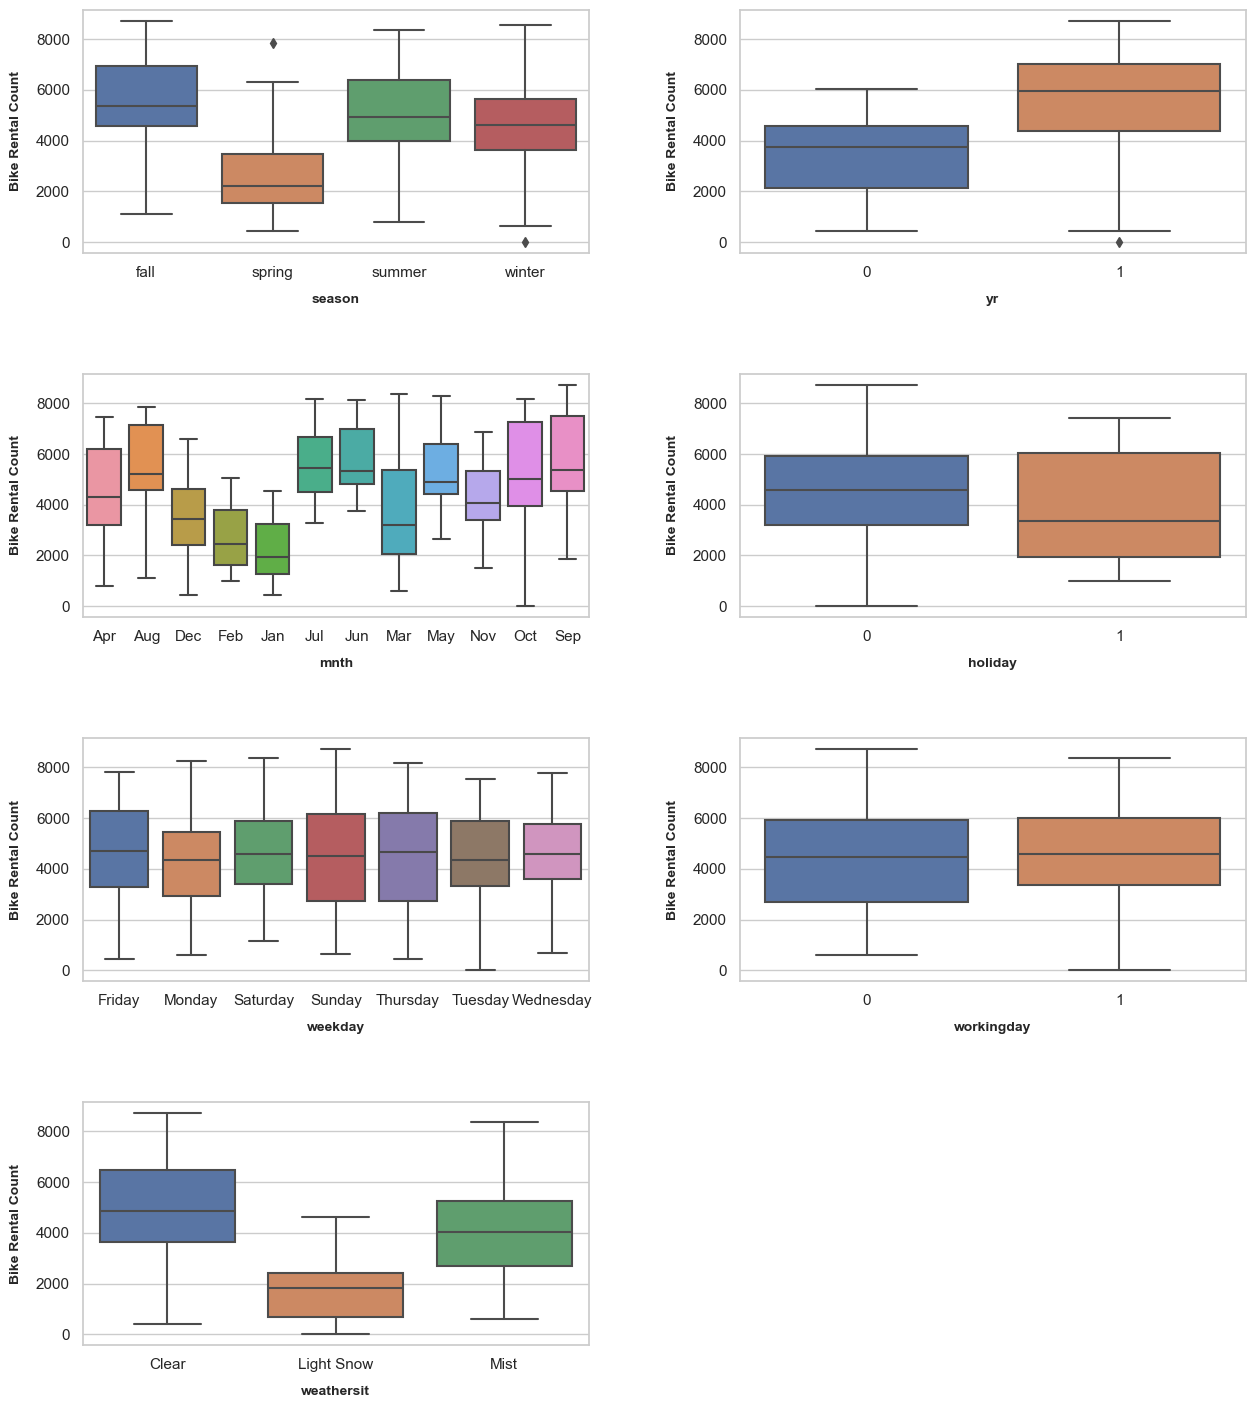

In [304]:
#------------------------- Analysing Categorical Variables with target variable 'cnt' ------------------------
categorical_variables = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.5, wspace=0.3)

for i in enumerate(categorical_variables):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
    plt.xlabel(i[1],fontweight='bold')
    plt.ylabel('Bike Rental Count',fontweight='bold')
plt.show()

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> - Bike rentals are more frequent in fall followed by summer and winter. We could see considerably less rentals in Spring. </font>
> </br> 
> <font size=3.5> - Bikes borrowed is very less in first quarter of the year, gradually rises in second and third quarter and again descends during the last quarter. Also, we could see increase in the number of borrowers from 2018 to 2019 indicating growth in the market. The company can capitalize on this trend by maintaining a competitive edge in the industry. </font>
> </br> 
> <font size=3.5> - 97% of bike bookings occurred when it was not a holiday, indicating a significant bias in the data</font>
> </br> 
> <font size=3.5> - No. of bikes borrowed is maximum when the weather is clear which reduces to almost half when weather is mist. When there is light snowfall, bikes borrowed is very less accounting only to 1% of total distribution
  </font>
> </br> 
> <font size=3.5> - Distribution across working and non-working days is found to be 70-30. This clearly states that fair amount of population use rented bikes not only for work, but in general as a communication mode </font>
> </br> 
> <font size=3.5> - More than 80% of users are registered customers </font>
> </br> 

#### <font color='black' size=3.2>1.5 Multivariate Analysis</font>

In [305]:
#Drawing pairplots to check for linear relationship

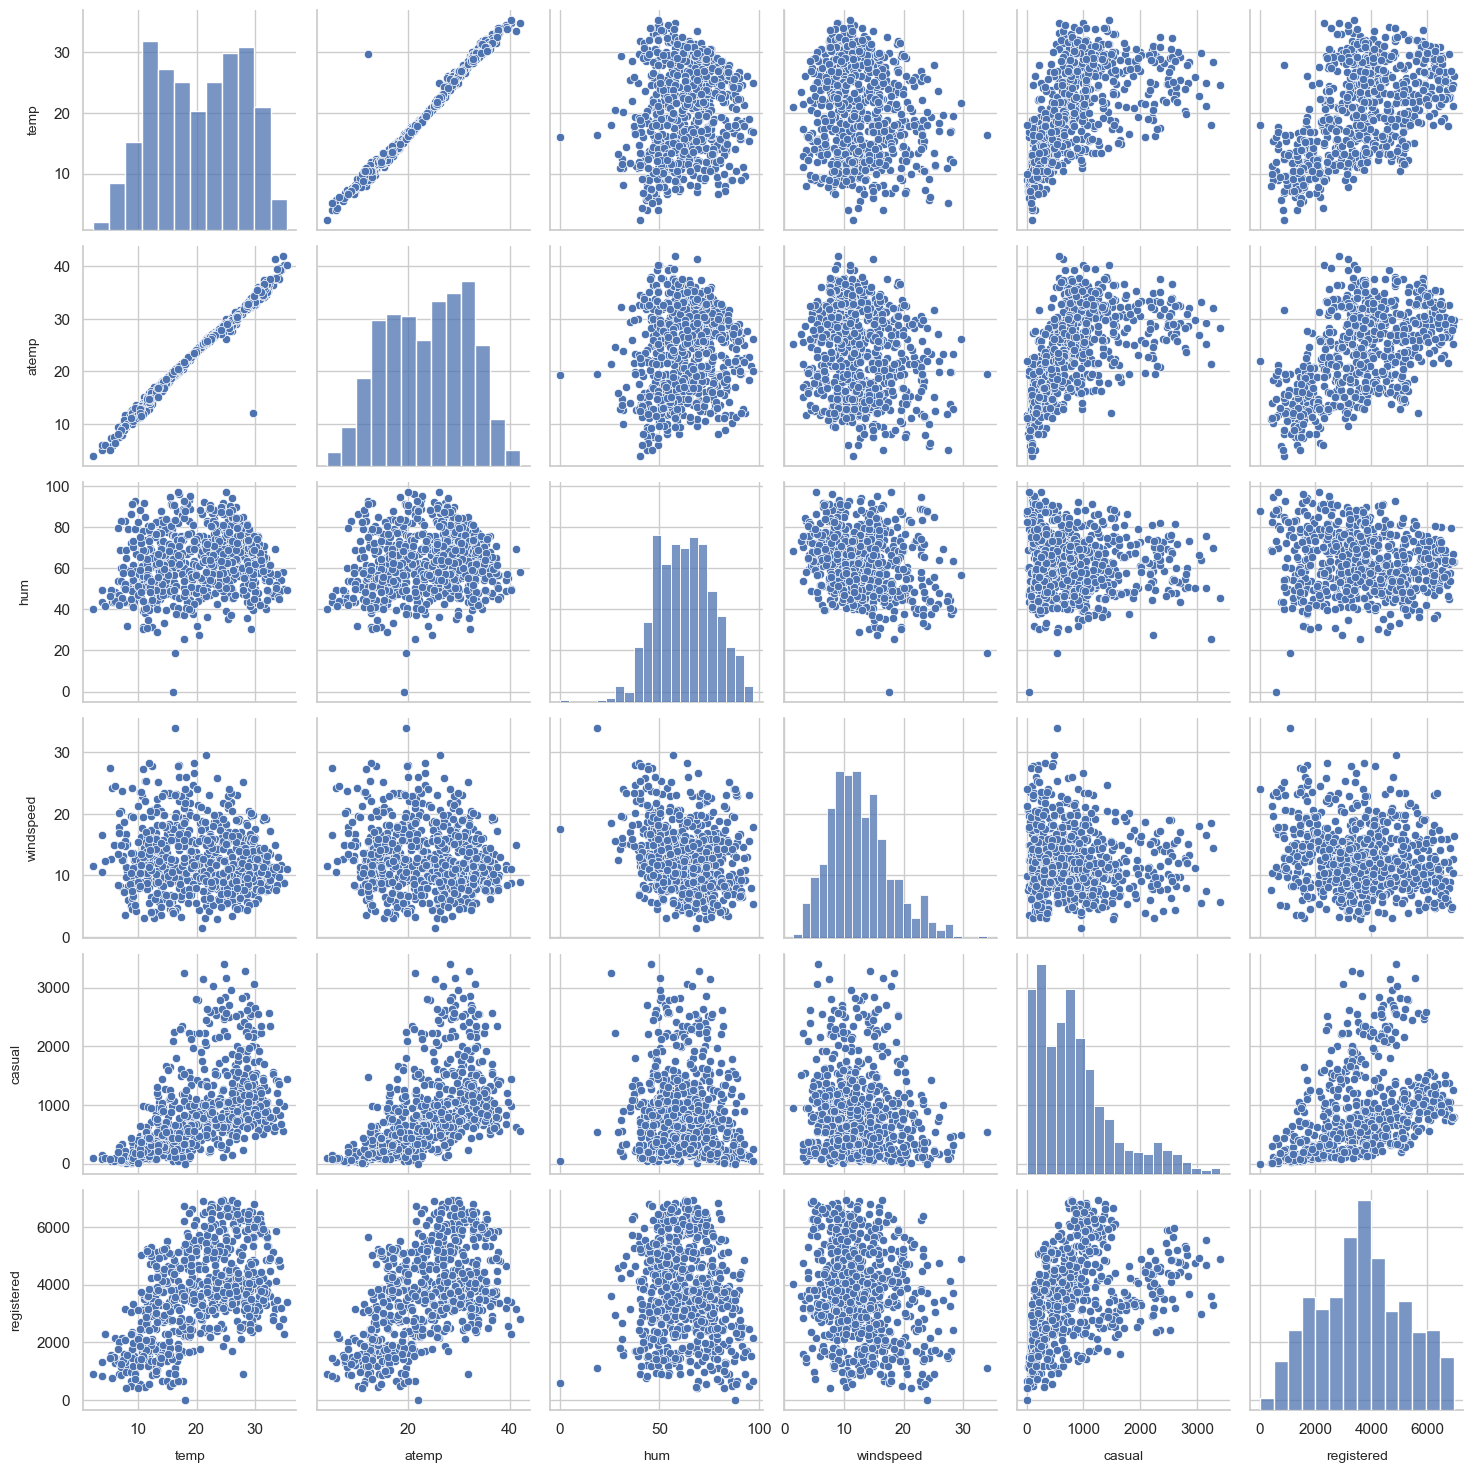

In [306]:
sns.pairplot(bike_df,vars=["temp", "atemp", "hum",'windspeed','casual','registered'])
plt.show()

In [307]:
#Find the correlation between the numeric variables

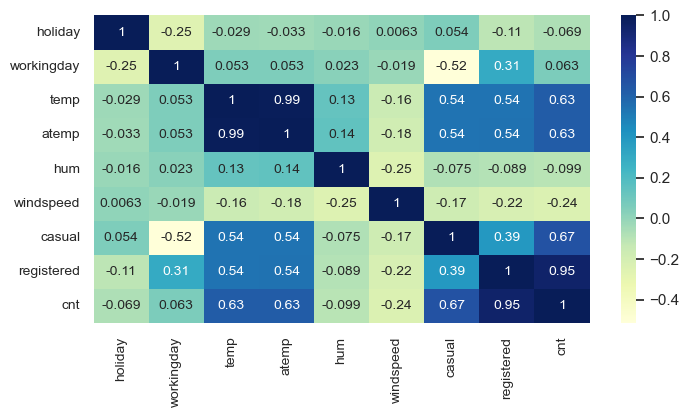

In [308]:
corrdf = bike_df[['holiday','workingday','temp', 'atemp', 'hum','windspeed','casual','registered','cnt']]
plt.figure(figsize=(8,4))
g= sns.heatmap(corrdf.corr(),annot=True,cmap="YlGnBu",annot_kws={'size': 10})
g.tick_params(labelsize=10)
plt.show()

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> - 'registered' exhibit highest correlation with cnt </font>
> </br> 
> <font size=3.5> - atemp and temp exhibit a strong correlation with cnt, indicating that favorable temperatures increases the bike rentals.</font>
> </br> 
> <font size=3.5> - atemp and temp show a strong correlation, suggesting potential redundancy.  </font>
> </br> 
> <font size=3.5> - holiday, windspeed and hum is negatively correlated with bike rentals  </font>
> </br> 

<font color='#006400' size=4.8><span style="text-decoration:underline">***Inferences from EDA:***</span></br></font>
</br>
</br>
<font size=3.5> - Almost 32% of the bike booking happened in Fall. This was followed by summer & winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable. </font>
</br>
</br>
<font size=3.5> - Most of the bike booking happened in the months 5,6,7,8 & 9. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. </font>
</br>
</br>
<font size=3.5> - Almost 68% of the bike booking happened when the weather was clear. This was followed by moderate Misty weather with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable. </font>
</br>
</br>
<font size=3.5> - Almost 97% of the bike booking happened when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. </font>
</br>
</br>
<font size=3.5> - weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week). This variable can have some or no influence towards the predictor. </font>
</br>
</br>
<font size=3.5> - Almost 69% of the bike booking heppened on workingday. This indicates, workingday can be a good predictor for the dependent variable. </font>
</br>
</br>
<font size=3.5> - atemp and temp show a strong correlation, suggesting potential redundancy. </font>
</br>
</br>

#### <font color='#000080' size=5>***2. Data Preparation:***</font>

#### <font color='black' size=3.2>2.1 Remove redundant variables</font>

In [309]:
#atemp and temp show a strong correlation, suggesting potential redundancy. Hence removing the feature atemp.

In [310]:
bike_df.drop('atemp',inplace=True,axis=1)

In [311]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
0,spring,0,Jan,0,Sunday,0,Mist,14.110847,80.5833,10.749882,331,654,985,1
1,spring,0,Jan,0,Monday,0,Mist,14.902598,69.6087,16.652113,131,670,801,2
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,3
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,4
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,5


#### <font color='black' size=3.2>2.2 Convert categorical variables to Dummy variable</font>

In [312]:
# creating dummy variables
season_dummy_var = pd.get_dummies(bike_df['season'],drop_first=True,dtype='int')
mnth_dummy_var = pd.get_dummies(bike_df['mnth'],drop_first=True,dtype='int')
weekday_dummy_var = pd.get_dummies(bike_df['weekday'],drop_first=True,dtype='int')
weathersit_dummy_var = pd.get_dummies(bike_df['weathersit'],drop_first=True,dtype='int')

In [313]:
bike_df = pd.concat([bike_df, season_dummy_var, weathersit_dummy_var, mnth_dummy_var, weekday_dummy_var], axis = 1)

In [314]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Sunday,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,0,0,0
1,spring,0,Jan,0,Monday,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,1,0
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,1
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [315]:
cat_var_to_drop = ["season","weathersit","mnth","weekday","casual","registered","day"]
bike_df.drop(cat_var_to_drop, inplace=True, axis=1)
bike_df.shape

(730, 29)

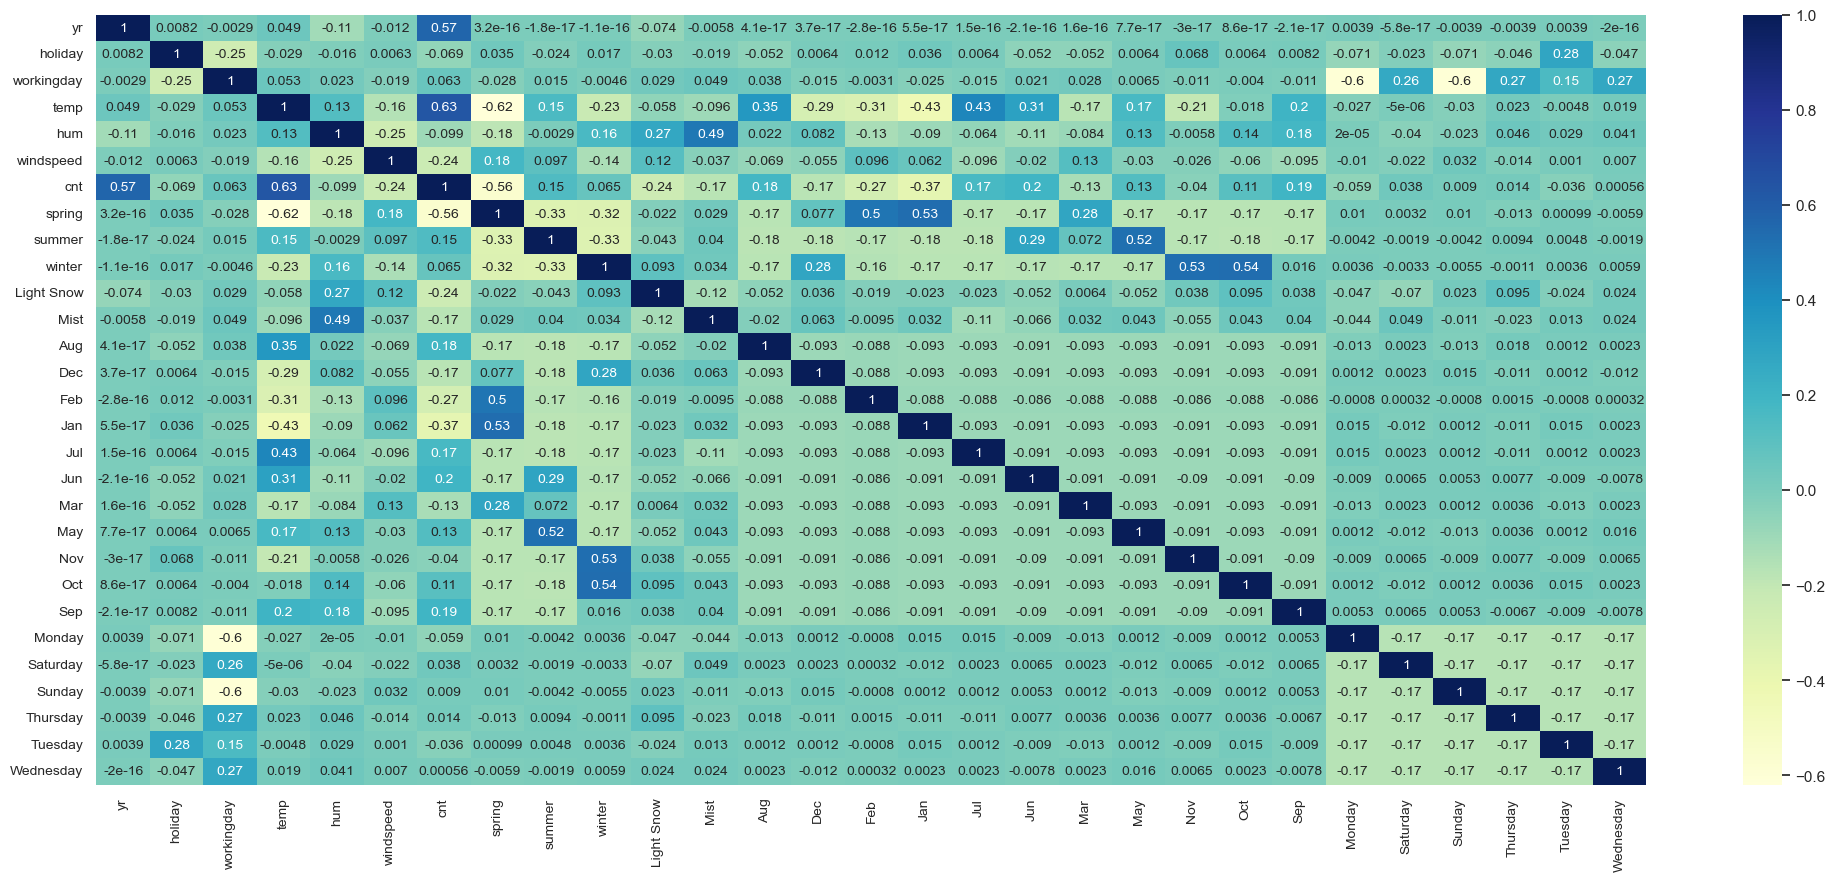

In [316]:
#Now find the correlation matrix to identify redundant variable
plt.figure(figsize=(25,10))
g= sns.heatmap(bike_df.corr(),annot=True,cmap="YlGnBu",annot_kws={'size': 10})
g.tick_params(labelsize=10)
plt.show()

In [317]:
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### <font color='black' size=3.2>2.3 Split the data into Train and Test set</font>

In [318]:
df_train, df_test = train_test_split(bike_df, train_size=0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


#### <font color='black' size=3.2>2.4. Rescaling Numeric variables </font>

In [319]:
num_var=['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()

df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,1,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [320]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [321]:
# Required columns are scaled so that values of all columns lies between 0 and 1

#### <font color='#000080' size=5>***3. Train the Model:***</font>

In [322]:
#Creating X_train and Y_train datasets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

#### <font color='black' size=3.2>3.1. Multiple linear regression model using all variables </font>

---------- Model 1: Multiple linear regression model using all variables ----------

In [323]:
X_train_lm = sm.add_constant(X_train)
lm1 = sm.OLS(y_train,X_train_lm).fit() 
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          3.00e-181
Time:                        19:34:04   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2395      0.035      6.768      0.000       0.170       0.309
yr             0.2324      0.008     28.819      0.000       0.217       0.248
holiday        0.0046      0.024      0.190      0.849      -0.043       0.052
workingday     0.0907      0.012      7.329      0.000       0.066       0.115
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring        -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer         0.0430      0.026      1.645      0.101      -0.008       0.094
winter         0.1076      0.028      3.853      0.000       0.053       0.163
Light Snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
Aug            0.0204      0.034      0.607      0.544      -0.046       0.086
Dec           -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb           -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan           -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul           -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun            0.0046      0.025      0.186      0.853      -0.044       0.053
Mar            0.0013      0.025      0.052      0.959      -0.047       0.050
May            0.0247      0.021      1.173      0.241      -0.017       0.066
Nov           -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct            0.0075      0.036      0.210      0.834      -0.063       0.078
Sep            0.0859      0.032      2.692      0.007       0.023       0.149
Monday         0.0450      0.014      3.253      0.001       0.018       0.072
Saturday       0.0091      0.016      0.588      0.557      -0.021       0.040
Sunday         0.0992      0.014      7.292      0.000       0.072       0.126
Thursday       0.0036      0.015      0.248      0.804      -0.025       0.032
Tuesday       -0.0118      0.015     -0.780      0.436      -0.042       0.018
Wednesday     -0.0088      0.015     -0.571      0.568      -0.039       0.022
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.19e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [324]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,86.40
24,Sunday,19.71
22,Monday,18.34
6,spring,10.75
8,winter,9.44
7,summer,8.27
3,temp,7.08
19,Nov,6.79
20,Oct,6.47
11,Aug,6.36


In [325]:
#Inference:
#Since we have many columns (28) and with multiple columns having high p-value and VIF, lets use RFE to eliminate set of features

#### <font color='black' size=3.2>3.2. Feature Elimination through RFE </font>

In [326]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(X_train, y_train)

In [327]:
col_selected = X_train.columns[rfe.support_]
col_selected

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light Snow', 'Mist', 'Dec', 'Feb', 'Jan', 'Jul',
       'May', 'Nov', 'Sep', 'Monday', 'Sunday'],
      dtype='object')

In [328]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'Oct', 'Saturday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

#### <font color='black' size=3.2>3.3. Manual Feature Elimination </font>

----------------- Model 2: Include only those predictor variables that are suggested by RFE -----------------

In [329]:
#Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[col_selected]
X_train_lm = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          5.20e-189
Time:                        19:34:04   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2475      0.030      8.194      0.000       0.188       0.307
yr             0.2318      0.008     29.103      0.000       0.216       0.247
holiday        0.0003      0.022      0.016      0.987      -0.042       0.043
workingday     0.0936      0.010      9.443      0.000       0.074       0.113
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
Light Snow    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Mist          -0.0583      0.010     -5.655      0.000      -0.079      -0.038
Dec           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Feb           -0.0348      0.021     -1.626      0.105      -0.077       0.007
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
Nov           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
Sep            0.0723      0.017      4.349      0.000       0.040       0.105
Monday         0.0495      0.012      4.002      0.000       0.025       0.074
Sunday         0.1040      0.012      8.744      0.000       0.081       0.127
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                     1.16e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [330]:
#Inference:
#Since p-value is very high for holiday (0.987), we can remove that because of low significance level

------------------- Model 3: Remove 'holiday'------------------

In [331]:
X_train_rfe = X_train_rfe.drop('holiday',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_lm).fit() 
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          5.20e-189
Time:                        19:34:04   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.045      5.472      0.000       0.159       0.337
yr             0.2318      0.008     29.103      0.000       0.216       0.247
workingday     0.0933      0.025      3.679      0.000       0.043       0.143
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
Light Snow    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Mist          -0.0583      0.010     -5.655      0.000      -0.079      -0.038
Dec           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Feb           -0.0348      0.021     -1.626      0.105      -0.077       0.007
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
Nov           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
Sep            0.0723      0.017      4.349      0.000       0.040       0.105
Monday         0.0492      0.027      1.827      0.068      -0.004       0.102
Sunday         0.1036      0.027      3.864      0.000       0.051       0.156
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,34.75
2,temp,22.48
1,workingday,19.11
5,spring,6.06
18,Sunday,5.10
4,windspeed,5.06
17,Monday,4.89
7,winter,4.40
6,summer,3.71
12,Jan,2.42


In [333]:
#Inference:
#p-value is high for May (0.186). So we can remove this variable

------------------- Model 4: Remove 'May'------------------

In [334]:
#p-value is very high for May
X_train_rfe = X_train_rfe.drop('May',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_lm).fit() 
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          9.80e-190
Time:                        19:34:04   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2368      0.045      5.315      0.000       0.149       0.324
yr             0.2312      0.008     29.052      0.000       0.216       0.247
workingday     0.0942      0.025      3.713      0.000       0.044       0.144
temp           0.4616      0.038     12.262      0.000       0.388       0.536
hum           -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
spring        -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer         0.0393      0.015      2.586      0.010       0.009       0.069
winter         0.1021      0.018      5.752      0.000       0.067       0.137
Light Snow    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
Mist          -0.0585      0.010     -5.668      0.000      -0.079      -0.038
Dec           -0.0474      0.018     -2.619      0.009      -0.083      -0.012
Feb           -0.0334      0.021     -1.562      0.119      -0.075       0.009
Jan           -0.0634      0.021     -2.991      0.003      -0.105      -0.022
Jul           -0.0515      0.018     -2.868      0.004      -0.087      -0.016
Nov           -0.0444      0.019     -2.371      0.018      -0.081      -0.008
Sep            0.0723      0.017      4.346      0.000       0.040       0.105
Monday         0.0500      0.027      1.855      0.064      -0.003       0.103
Sunday         0.1040      0.027      3.875      0.000       0.051       0.157
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [335]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,34.64
2,temp,22.30
1,workingday,18.92
5,spring,6.05
17,Sunday,5.04
4,windspeed,4.99
16,Monday,4.85
7,winter,4.40
6,summer,3.11
12,Jan,2.42


In [336]:
#Inference:
#p-value is high for Feb (0.119). So we can remove this variable

------------------- Model 5: Remove 'Feb'------------------

In [337]:
#p-value is very high for May
X_train_rfe = X_train_rfe.drop('Feb',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_lm).fit() 
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          2.52e-190
Time:                        19:34:04   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2235      0.044      5.103      0.000       0.137       0.310
yr             0.2309      0.008     28.978      0.000       0.215       0.247
workingday     0.0964      0.025      3.801      0.000       0.047       0.146
temp           0.4764      0.036     13.064      0.000       0.405       0.548
hum           -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0424      0.015      2.809      0.005       0.013       0.072
winter         0.1038      0.018      5.845      0.000       0.069       0.139
Light Snow    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
Mist          -0.0583      0.010     -5.637      0.000      -0.079      -0.038
Dec           -0.0388      0.017     -2.248      0.025      -0.073      -0.005
Jan           -0.0455      0.018     -2.548      0.011      -0.081      -0.010
Jul           -0.0524      0.018     -2.916      0.004      -0.088      -0.017
Nov           -0.0399      0.019     -2.152      0.032      -0.076      -0.003
Sep            0.0737      0.017      4.430      0.000       0.041       0.106
Monday         0.0520      0.027      1.931      0.054      -0.001       0.105
Sunday         0.1068      0.027      3.984      0.000       0.054       0.160
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,34.19
2,temp,21.56
1,workingday,18.84
5,spring,5.06
16,Sunday,5.03
4,windspeed,4.99
15,Monday,4.83
7,winter,4.40
6,summer,3.09
9,Mist,2.35


In [339]:
#Inference:
#VIF is very high for hum (34.19). So we can remove this variable

------------------- Model 6: Remove 'hum'------------------

In [340]:
X_train_rfe = X_train_rfe.drop('hum',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_lm).fit() 
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          4.83e-188
Time:                        19:34:04   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1542      0.041      3.776      0.000       0.074       0.234
yr             0.2346      0.008     29.217      0.000       0.219       0.250
workingday     0.0972      0.026      3.776      0.000       0.047       0.148
temp           0.4370      0.036     12.260      0.000       0.367       0.507
windspeed     -0.1602      0.025     -6.452      0.000      -0.209      -0.111
spring        -0.0698      0.021     -3.304      0.001      -0.111      -0.028
summer         0.0356      0.015      2.339      0.020       0.006       0.066
winter         0.0901      0.018      5.095      0.000       0.055       0.125
Light Snow    -0.2976      0.024    -12.277      0.000      -0.345      -0.250
Mist          -0.0821      0.009     -9.590      0.000      -0.099      -0.065
Dec           -0.0458      0.017     -2.627      0.009      -0.080      -0.012
Jan           -0.0517      0.018     -2.864      0.004      -0.087      -0.016
Jul           -0.0475      0.018     -2.609      0.009      -0.083      -0.012
Nov           -0.0407      0.019     -2.162      0.031      -0.078      -0.004
Sep            0.0674      0.017      4.009      0.000       0.034       0.100
Monday         0.0498      0.027      1.822      0.069      -0.004       0.104
Sunday         0.1094      0.027      4.022      0.000       0.056       0.163
==============================================================================
Omnibus:                       79.557   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.036
Skew:                          -0.766   Prob(JB):                     1.23e-47
Kurtosis:                       5.796   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,17.17
2,temp,13.62
3,windspeed,4.85
15,Sunday,4.70
14,Monday,4.39
4,spring,4.24
6,winter,3.71
5,summer,2.78
0,yr,2.08
12,Nov,1.80


In [342]:
#Inference:
#p-value is high for Monday (0.069). So we can remove this variable

------------------- Model 7: Remove 'Monday'------------------

In [343]:
X_train_rfe = X_train_rfe.drop('Monday',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_lm).fit() 
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          1.84e-188
Time:                        19:34:04   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.033      6.031      0.000       0.134       0.263
yr             0.2348      0.008     29.173      0.000       0.219       0.251
workingday     0.0547      0.011      5.009      0.000       0.033       0.076
temp           0.4354      0.036     12.191      0.000       0.365       0.506
windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer         0.0354      0.015      2.320      0.021       0.005       0.065
winter         0.0903      0.018      5.093      0.000       0.055       0.125
Light Snow    -0.2969      0.024    -12.222      0.000      -0.345      -0.249
Mist          -0.0818      0.009     -9.526      0.000      -0.099      -0.065
Dec           -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Jan           -0.0526      0.018     -2.905      0.004      -0.088      -0.017
Jul           -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Nov           -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Sep            0.0652      0.017      3.880      0.000       0.032       0.098
Sunday         0.0670      0.014      4.758      0.000       0.039       0.095
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
4,spring,3.09
6,winter,3.03
5,summer,2.33
0,yr,2.08
14,Sunday,1.86
12,Nov,1.79
10,Jan,1.67


In [345]:
#Check correlation between the predictor variables now

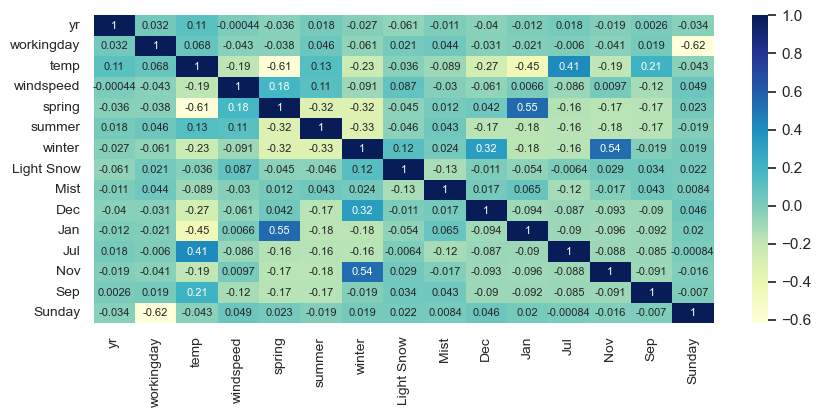

In [346]:
plt.figure(figsize=(10,4))
g= sns.heatmap(X_train_rfe.corr(),annot=True,cmap="YlGnBu",annot_kws={'size': 8})
g.tick_params(labelsize=10)
plt.show()

In [347]:
#Inference:
#Though temp is having high VIF, we cannot remove this variable as it has high positive coefficient (0.4354). 
#So when checked the correlation of temp with other predictor variables, we see that it has strong correlation with 'Jul'. 
#Since 'Jul' has comparitively less coefficient value (-0.0466), we can remove this variable and check

------------------- Model 8: Remove 'Jul'------------------

In [348]:
X_train_rfe = X_train_rfe.drop('Jul',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_lm).fit() 
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          3.30e-188
Time:                        19:34:05   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     495   BIC:                            -926.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1911      0.033      5.798      0.000       0.126       0.256
yr             0.2353      0.008     29.084      0.000       0.219       0.251
workingday     0.0556      0.011      5.068      0.000       0.034       0.077
temp           0.4224      0.036     11.883      0.000       0.353       0.492
windspeed     -0.1614      0.025     -6.449      0.000      -0.211      -0.112
spring        -0.0604      0.021     -2.901      0.004      -0.101      -0.020
summer         0.0491      0.014      3.421      0.001       0.021       0.077
winter         0.1014      0.017      5.869      0.000       0.067       0.135
Light Snow    -0.2979      0.024    -12.197      0.000      -0.346      -0.250
Mist          -0.0805      0.009     -9.343      0.000      -0.097      -0.064
Dec           -0.0472      0.018     -2.690      0.007      -0.082      -0.013
Jan           -0.0546      0.018     -3.004      0.003      -0.090      -0.019
Nov           -0.0444      0.019     -2.359      0.019      -0.081      -0.007
Sep            0.0779      0.016      4.820      0.000       0.046       0.110
Sunday         0.0673      0.014      4.756      0.000       0.040       0.095
==============================================================================
Omnibus:                       88.605   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.625
Skew:                          -0.848   Prob(JB):                     2.06e-53
Kurtosis:                       5.922   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [349]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,5.61
1,workingday,4.74
3,windspeed,4.71
4,spring,2.96
6,winter,2.85
0,yr,2.07
5,summer,2.00
13,Sunday,1.86
11,Nov,1.79
10,Jan,1.66


In [350]:
#Inference:
#Now VIF of temp is considerably reduced. 
#We can now remove next highly correlated variable Sep, which has comparitively low coefficient value (0.0779)

------------------- Model 9: Remove 'Sep'------------------

In [351]:
X_train_rfe = X_train_rfe.drop('Sep',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_lm).fit() 
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          1.88e-184
Time:                        19:34:05   Log-Likelihood:                 498.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     496   BIC:                            -909.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2272      0.033      6.924      0.000       0.163       0.292
yr             0.2354      0.008     28.457      0.000       0.219       0.252
workingday     0.0557      0.011      4.959      0.000       0.034       0.078
temp           0.4016      0.036     11.135      0.000       0.331       0.472
windspeed     -0.1678      0.026     -6.567      0.000      -0.218      -0.118
spring        -0.0858      0.021     -4.165      0.000      -0.126      -0.045
summer         0.0264      0.014      1.904      0.058      -0.001       0.054
winter         0.0884      0.017      5.069      0.000       0.054       0.123
Light Snow    -0.2949      0.025    -11.814      0.000      -0.344      -0.246
Mist          -0.0778      0.009     -8.849      0.000      -0.095      -0.060
Dec           -0.0589      0.018     -3.313      0.001      -0.094      -0.024
Jan           -0.0601      0.019     -3.237      0.001      -0.097      -0.024
Nov           -0.0583      0.019     -3.063      0.002      -0.096      -0.021
Sunday         0.0672      0.014      4.647      0.000       0.039       0.096
==============================================================================
Omnibus:                       89.236   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.141
Skew:                          -0.833   Prob(JB):                     3.24e-57
Kurtosis:                       6.077   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [352]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,5.42
1,workingday,4.72
3,windspeed,4.71
4,spring,2.91
6,winter,2.84
0,yr,2.07
5,summer,1.88
12,Sunday,1.85
11,Nov,1.77
10,Jan,1.66


In [353]:
#Inference:
#p-value of summer is high (0.058). Hence remove this variable

------------------- Model 10: Remove 'summer'------------------

In [354]:
X_train_rfe = X_train_rfe.drop('summer',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_lm).fit() 
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          7.71e-185
Time:                        19:34:06   Log-Likelihood:                 496.44
No. Observations:                 510   AIC:                            -966.9
Df Residuals:                     497   BIC:                            -911.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2635      0.027      9.844      0.000       0.211       0.316
yr             0.2361      0.008     28.497      0.000       0.220       0.252
workingday     0.0557      0.011      4.948      0.000       0.034       0.078
temp           0.3649      0.031     11.941      0.000       0.305       0.425
windspeed     -0.1623      0.025     -6.377      0.000      -0.212      -0.112
spring        -0.1112      0.016     -7.060      0.000      -0.142      -0.080
winter         0.0696      0.014      4.831      0.000       0.041       0.098
Light Snow    -0.2976      0.025    -11.913      0.000      -0.347      -0.249
Mist          -0.0775      0.009     -8.793      0.000      -0.095      -0.060
Dec           -0.0640      0.018     -3.632      0.000      -0.099      -0.029
Jan           -0.0654      0.018     -3.554      0.000      -0.101      -0.029
Nov           -0.0633      0.019     -3.354      0.001      -0.100      -0.026
Sunday         0.0669      0.015      4.613      0.000       0.038       0.095
==============================================================================
Omnibus:                       90.423   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.207
Skew:                          -0.839   Prob(JB):                     9.48e-59
Kurtosis:                       6.124   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,5.41
1,workingday,4.52
3,windspeed,4.10
5,winter,2.53
4,spring,2.44
0,yr,2.06
11,Sunday,1.82
10,Nov,1.77
9,Jan,1.66
7,Mist,1.54


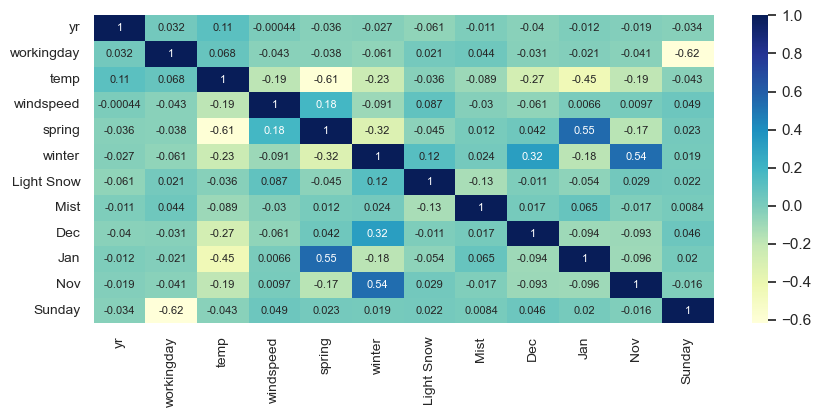

In [356]:
plt.figure(figsize=(10,4))
g= sns.heatmap(X_train_rfe.corr(),annot=True,cmap="YlGnBu",annot_kws={'size': 8})
g.tick_params(labelsize=10)
plt.show()

In [357]:
#Inference:
#When analyzed the correlation of temp variable again, we see that it is highly correlated to yr and working day
#When compared the coefficients values, yr is having higher value where as workingday has comparatively very less coefficient value (0.0557)
#We can now remove next workingday and check

------------------- Model 11: Remove 'workingday'------------------

In [358]:
X_train_rfe = X_train_rfe.drop('workingday',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_lm).fit() 
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          7.58e-181
Time:                        19:34:06   Log-Likelihood:                 484.18
No. Observations:                 510   AIC:                            -944.4
Df Residuals:                     498   BIC:                            -893.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3079      0.026     11.932      0.000       0.257       0.359
yr             0.2366      0.008     27.917      0.000       0.220       0.253
temp           0.3660      0.031     11.704      0.000       0.305       0.427
windspeed     -0.1638      0.026     -6.291      0.000      -0.215      -0.113
spring        -0.1138      0.016     -7.064      0.000      -0.145      -0.082
winter         0.0659      0.015      4.474      0.000       0.037       0.095
Light Snow    -0.2899      0.026    -11.362      0.000      -0.340      -0.240
Mist          -0.0744      0.009     -8.269      0.000      -0.092      -0.057
Dec           -0.0623      0.018     -3.453      0.001      -0.098      -0.027
Jan           -0.0648      0.019     -3.442      0.001      -0.102      -0.028
Nov           -0.0653      0.019     -3.381      0.001      -0.103      -0.027
Sunday         0.0224      0.012      1.922      0.055      -0.000       0.045
==============================================================================
Omnibus:                       90.768   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.615
Skew:                          -0.871   Prob(JB):                     2.81e-54
Kurtosis:                       5.928   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [359]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,3.99
1,temp,3.62
4,winter,2.51
3,spring,2.34
0,yr,2.06
9,Nov,1.77
8,Jan,1.65
6,Mist,1.51
7,Dec,1.46
10,Sunday,1.19


In [360]:
#Inference:
#p-value of Sunday is high (0.055). Hence remove this variable

------------------- Model 12: Remove 'Sunday'------------------

In [361]:
X_train_rfe = X_train_rfe.drop('Sunday',axis=1)
X_train_lm = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_lm).fit() 
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          3.02e-181
Time:                        19:34:06   Log-Likelihood:                 482.30
No. Observations:                 510   AIC:                            -942.6
Df Residuals:                     499   BIC:                            -896.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3108      0.026     12.034      0.000       0.260       0.362
yr             0.2362      0.008     27.797      0.000       0.219       0.253
temp           0.3656      0.031     11.659      0.000       0.304       0.427
windspeed     -0.1614      0.026     -6.188      0.000      -0.213      -0.110
spring        -0.1139      0.016     -7.051      0.000      -0.146      -0.082
winter         0.0663      0.015      4.491      0.000       0.037       0.095
Light Snow    -0.2892      0.026    -11.304      0.000      -0.339      -0.239
Mist          -0.0742      0.009     -8.233      0.000      -0.092      -0.057
Dec           -0.0612      0.018     -3.385      0.001      -0.097      -0.026
Jan           -0.0642      0.019     -3.400      0.001      -0.101      -0.027
Nov           -0.0661      0.019     -3.413      0.001      -0.104      -0.028
==============================================================================
Omnibus:                       84.358   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.643
Skew:                          -0.796   Prob(JB):                     9.17e-53
Kurtosis:                       5.957   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
#Compute VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,3.96
1,temp,3.58
4,winter,2.50
3,spring,2.34
0,yr,2.06
9,Nov,1.77
8,Jan,1.64
6,Mist,1.51
7,Dec,1.45
5,Light Snow,1.08


> <font color='#006400' size=4.8><span style="text-decoration:underline">***Inference:***</span></br></font>
> </br>
> <font size=3.5> - Our Final Model (Model 12) has 10 predictor variables with R-squared:0.824 and Adj. R-squared:0.821 </font>
> </br> 
> <font size=3.5> - VIF is less than 5 for all predictor variables. </font>
> </br> 
> <font size=3.5> -  p-value is less than 0.05 for all predictor variables  </font>
> </br> 

### <font color='#000080' size=5>***4. Residual Analysis of the train data:***</font>

#### <font color='black' size=3.2>4.1. The residuals should be approximately normally distributed. </font>

In [363]:
y_train_pred = lm12.predict(X_train_lm)
res = y_train - y_train_pred

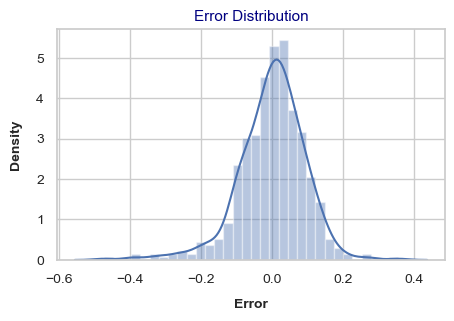

In [364]:
plt.figure(figsize=(5,3))
fig = sns.distplot(res)
plt.xlabel("Error",fontweight='bold',fontsize=10)
plt.ylabel('Density',fontweight='bold',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Error Distribution',fontdict={"fontsize":11, "color":"#000080"})
plt.show()

#### <font color='black' size=3.2>4.2. Homoscedasticity & Linearity</font>

In [365]:
#Homoscedasticity: The variance of residuals should be constant across all levels of the independent variables, 
#indicating consistent levels of variability.

##Linearity - points should fall approximately along the reference line indicating linear relationship

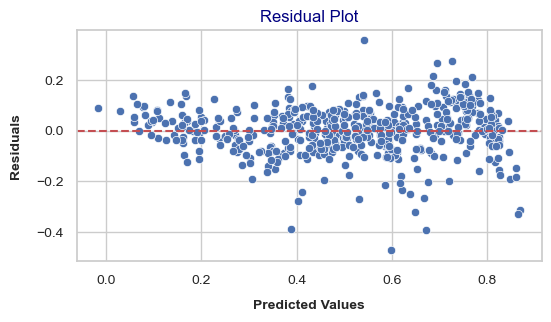

In [366]:
plt.figure(figsize=(6,3))
sns.scatterplot(x = y_train_pred, y = res)
plt.xlabel('Predicted Values',fontweight='bold',fontsize=10)
plt.ylabel('Residuals',fontweight='bold',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Residual Plot',fontdict={"fontsize":12, "color":"#000080"})
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

#### <font color='black' size=3.2>4.3. Visualize the trained model with a linear regression fit line </font>

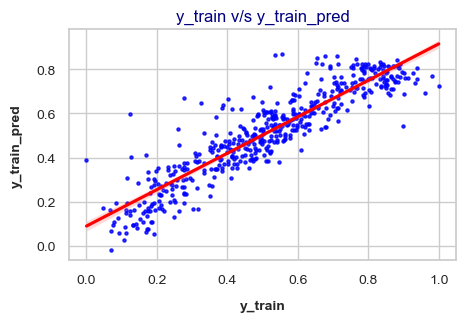

In [367]:
# Visualize the trained model using a scatter plot with a linear regression fit line
plt.figure(figsize=(5,3))
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 5, 'color': 'blue' })

# Show the plot
plt.title('y_train v/s y_train_pred',fontdict={"fontsize":12, "color":"#000080"})
plt.xlabel('y_train',fontweight='bold',fontsize=10)
plt.ylabel('y_train_pred',fontweight='bold',fontsize=10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### <font color='black' size=3.2>4.4. Calculate Evaluation Metrics </font>

In [368]:
#R2 value
r2_train=r2_score(y_train, y_train_pred)

In [369]:
#Adjusted R2 value
p = len(X_train_rfe.columns)
n = len(y_train)
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

In [370]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)
# Calculate RMSE
rmse_train = np.sqrt(mse_train)
print(rmse_train)

0.09398512764763133


#### <font color='#000080' size=5>***5. Making Predictions:***</font>

#### <font color='black' size=3.2>5.1 Apply scaling on the test sets </font>

In [371]:
num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### <font color='black' size=3.2>5.2 Dividing into X_test and y_test </font>

In [372]:
y_test = df_test.pop('cnt')
X_test = df_test

In [373]:
# Now let's use our model to make predictions.
# Consider only those columns which is deduced from the final model
X_test = X_test[X_train_rfe.columns]

#### <font color='black' size=3.2>5.3 Predicting the test set</font>

In [374]:
# Adding a constant variable and predicting the test set
X_test_new = sm.add_constant(X_test)
y_test_pred = lm12.predict(X_test_new)

#### <font color='#000080' size=5>***6. Model Evaluation:***</font>

#### <font color='black' size=3.2>6.1 Calculate Evaluation Metrics </font>

In [375]:
#R2 value on Test set
r2_test = r2_score(y_test, y_test_pred)

In [376]:
#Adjusted R2 value on Test Set
p = len(X_test.columns)
n = len(y_test)
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

In [377]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)
# Calculate RMSE
rmse_test = np.sqrt(mse_test)
print(rmse_test)

0.09471149679147882


#### <font color='black' size=3.2>6.2 Visualize the predicted model with a linear regression fit line </font>

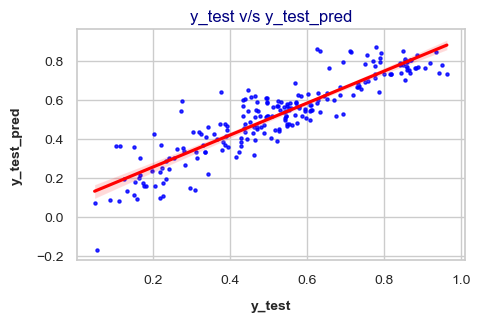

In [378]:
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 5, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred',fontdict={"fontsize":12, "color":"#000080"})
plt.xlabel('y_test',fontweight='bold',fontsize=10)
plt.ylabel('y_test_pred',fontweight='bold',fontsize=10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### <font color='black' size=3.2>6.3 Final Analysis </font>

In [379]:
# Print the R2 , Adjusted R2 scores and Root Mean Squared Error for the training and the test set
print(f'Training Set: \tR2 - {format(r2_train, ".3f")}\n\t\tAdjusted R2 - {format(adjusted_r2_train, ".3f")}\n\t\tRMSE - {format(rmse_train, ".3f")}\n')
print(f'Test Set: \tR2 - {format(r2_test, ".3f")}\n\t\tAdjusted R2 - {format(adjusted_r2_test, ".3f")}\n\t\tRMSE - {format(rmse_test, ".3f")}')

Training Set: 	R2 - 0.824
		Adjusted R2 - 0.821
		RMSE - 0.094

Test Set: 	R2 - 0.812
		Adjusted R2 - 0.803
		RMSE - 0.095


In [380]:
# Coefficients of the final model
print("Coefficients of the final model")
print("-------------------------------------")
round(lm12.params, 2)

Coefficients of the final model
-------------------------------------


const         0.31
yr            0.24
temp          0.37
windspeed    -0.16
spring       -0.11
winter        0.07
Light Snow   -0.29
Mist         -0.07
Dec          -0.06
Jan          -0.06
Nov          -0.07
dtype: float64

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Inference:***</span></br></font>
> </br>
> <font size=3.5> - There is a close alignment of R-Squared and Adjusted R-Squared values between Training and Test set indicating effective generalization </font>
> </br> 
> <font size=3.5> - These values suggests that model avoids overfitting to the training data and is likely to perform consistently on new, unseen data  </font>
> </br> 

<font color='#006400' size=4.8><span style="text-decoration:underline">***Conclusion:***</span></br></font>
</br>
</br>
<font size=3.5>1. The equation of the best fit line is given by:</font>
</br>
<font size=3.5>cnt = 0.31 + 0.24*yr + 0.37*temp - 0.16*windspeed - 0.11*spring + 0.07*winter - 0.29*Light Snow - 0.07*Mist - 0.06*Dec - 0.06*Jan - 0.07*Nov </font>
</br>
</br>
<font size=3.5>2. The close alignment of R2 and adjusted R2 values between the training and test sets (R2: 0.824 vs. 0.812 and Adjusted R2: 0.821 vs. 0.803) in a linear regression model indicates effective generalization. This similarity suggests the model avoids overfitting to the training data and is likely to perform consistently on new, unseen data.</font>
</br>
</br>
<font size=3.5>3. Bike rental is highly influenced by the features - yr, temp, windspeed, spring, winter, Light Snow, Mist, Dec, Jan, Nov</font>
</br>
</br>
<font size=3.5>4. Top 3 variables that exhibit the highest coefficient values are temp, yr and Light snow, indicating their significant impact</font>
</br>
</br>
<font size=3.5>5. The RMSE values of 0.094 in the training set and 0.095 in the test set for a linear regression model indicate that the model is fitting well to the training data and generalizing reasonably to new, unseen data</font>
</br>
</br>

<font color='#006400' size=4.8><span style="text-decoration:underline">***Recommendations:***</span></br></font>
</br>
<ul>
<li>
<font size=3.5>Focus on features such as yr and temp as they exhibit highest coefficient values, indicating significant impact on bike demand </font>
</br>
</br>
</li>
<li>
<font size=3.5>Develop targeted marketing and pricing strategies for different seasons especially in spring and winter </font>
</br>
</br>
</li>
<li>
<font size=3.5>Implement weather-specific promotions or incentives to encourage bike usage during unfavorable weather conditions.</font>
</br>
</br>
</li>
<li>
<font size=3.5>Need to employ strategies to improve bike rentals during the months of Nov, Dec and Jan.</font>
</br>
</li>
</ul>
</br>